# Importing the libraries

In [ ]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use('fivethirtyeight')

**please choose file named as 'Twitt_login.csv'**

In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
log = pd.read_csv('Twitt_login.csv')

In [ ]:
apikey = log['key'][0]
apisecret = log['key'][1]
accesstoken = log['key'][2]
accesssecret = log['key'][3]

In [ ]:
authenticate = tweepy.OAuthHandler(apikey,apisecret)

authenticate.set_access_token(accesstoken, accesssecret)

api = tweepy.API(authenticate, wait_on_rate_limit= True)

# Fetching data from twitter

## a) retriving current 200 tweets from 4 celebrities each

In [ ]:
screenname= ['BillGates','realDonaldTrump','imVkohli','elonmusk']
public_tweet =[]
for i in screenname:
  public_tweets =api.user_timeline(screen_name= i, count=200, lang='en')
  public_tweet+=public_tweets

In [ ]:
df = pd.DataFrame(data=[tweet.text for tweet in public_tweet],columns=['tweets'])
df['id'] =np.array([tweet.id for tweet in public_tweet])
df['len'] =np.array([len(tweet.text) for tweet in public_tweet])
df['date'] =np.array([tweet.created_at for tweet in public_tweet])
df['source'] =np.array([tweet.source for tweet in public_tweet])
df['likes'] =np.array([tweet.favorite_count for tweet in public_tweet])
df['retweets'] =np.array([tweet.retweet_count for tweet in public_tweet])

df.reset_index(drop=True)

df

,tweets,id,len,date,source,likes,retweets
0,In order to solve our world’s sanitation crisi...,1594049106615291907,140,2022-11-19 19:24:57,Twitter Web App,4333,700
1,Collaboration and more open access to data hav...,1593708872291663872,140,2022-11-18 20:52:59,Twitter Web App,1352,312
2,From decreasing maternal mortality to lowering...,1593678220645511168,140,2022-11-18 18:51:11,Twitter Web App,1453,232
3,Africa has always been at the heart of our fou...,1593340000149549056,140,2022-11-17 20:27:13,Twitter Web App,2247,412
4,@Amref_Worldwide is doing great things for hea...,1593334489656139779,133,2022-11-17 20:05:19,Twitter Web App,259,35
...,...,...,...,...,...,...,...
785,@TheQuartering Q&amp;A tomorrow,1598857550329675776,31,2022-12-03 01:51:59,Twitter for iPhone,57466,4679
786,@hodgetwins @micsolana Twitter acting by itsel...,1598853708443357185,140,2022-12-03 01:36:44,Twitter for iPhone,211258,49323
787,@micsolana If this isn’t a violation of the Co...,1598850682487943168,84,2022-12-03 01:24:42,Twitter for iPhone,117281,19869
788,@micsolana “Handled” 🔥🔥🔥,1598848785060200450,24,2022-12-03 01:17:10,Twitter for iPhone,215157,18976


In [ ]:
user_name = []
for i in public_tweet:
  name = i.user.screen_name
  user_name.append(name)

NameError: ignored

In [ ]:
df['username']=np.array(user_name)
df

,tweets,id,len,date,source,likes,retweets,username
0,In order to solve our world’s sanitation crisi...,1594049106615291907,140,2022-11-19 19:24:57,Twitter Web App,4333,700,BillGates
1,Collaboration and more open access to data hav...,1593708872291663872,140,2022-11-18 20:52:59,Twitter Web App,1352,312,BillGates
2,From decreasing maternal mortality to lowering...,1593678220645511168,140,2022-11-18 18:51:11,Twitter Web App,1453,232,BillGates
3,Africa has always been at the heart of our fou...,1593340000149549056,140,2022-11-17 20:27:13,Twitter Web App,2247,412,BillGates
4,@Amref_Worldwide is doing great things for hea...,1593334489656139779,133,2022-11-17 20:05:19,Twitter Web App,259,35,BillGates
...,...,...,...,...,...,...,...,...
785,@TheQuartering Q&amp;A tomorrow,1598857550329675776,31,2022-12-03 01:51:59,Twitter for iPhone,57466,4679,elonmusk
786,@hodgetwins @micsolana Twitter acting by itsel...,1598853708443357185,140,2022-12-03 01:36:44,Twitter for iPhone,211258,49323,elonmusk
787,@micsolana If this isn’t a violation of the Co...,1598850682487943168,84,2022-12-03 01:24:42,Twitter for iPhone,117281,19869,elonmusk
788,@micsolana “Handled” 🔥🔥🔥,1598848785060200450,24,2022-12-03 01:17:10,Twitter for iPhone,215157,18976,elonmusk


## b) fetching user information for 4 celebrities

In [ ]:
list_count = []
Total_like = []
Total_follower = []
Total_tweet = []
Total_friends = []
location = []
for i in screenname:
  user = api.get_user(i)
  listed_count = user.listed_count
  list_count.append(listed_count)
  favourites_count = user.favourites_count
  Total_like.append(favourites_count)
  followers_count = user.followers_count
  Total_follower.append(followers_count)
  statuses_count = user.statuses_count
  Total_tweet.append(statuses_count)
  friends_count = user.friends_count
  Total_friends.append(friends_count)
  locations = user.location
  location.append(locations)

In [ ]:
dict = {'Username': screenname, 'followers': Total_follower, 'tweet_count': Total_tweet, 'Location':location, 'Friend': Total_friends , 'like_count': Total_like, 'list_count': list_count}
res = pd.DataFrame(dict)
res

,Username,followers,tweet_count,Location,Friend,like_count,list_count
0,BillGates,61336296,4142,"Seattle, WA",531,430,121382
1,realDonaldTrump,87866091,59150,"Washington, DC",49,0,112770
2,imVkohli,52430896,2729,,66,246,8994
3,elonmusk,120712380,21155,,142,15816,105009


## c) Retriving tweets based on the input keyword

In [ ]:
words = input("Enter Twitter HashTag to search for like '#FIFAWorldCup'") #taking input for keyword to retrieve tweets
twts =tweepy.Cursor(api.search, q=words, lang='en').items(2000)  # using cursor function of tweepy to fetch 2000 items

Enter Twitter HashTag to search for like '#FIFAWorldCup'#FIFAWorldCup


In [ ]:
twts1 = [twt for twt in twts]

In [ ]:
df2 = pd.DataFrame(data=[tweet.text for tweet in twts1],columns=['tweets']) #Designing a dataframe
# retriving differnt columns for the data frame from tweets 
df2['id'] =np.array([tweet.id for tweet in twts1])
df2['len'] =np.array([len(tweet.text) for tweet in twts1])
df2['date'] =np.array([tweet.created_at for tweet in twts1])
df2['source'] =np.array([tweet.source for tweet in twts1])
df2['likes'] =np.array([tweet.favorite_count for tweet in twts1])
df2['retweets'] =np.array([tweet.retweet_count for tweet in twts1])

df2.reset_index(drop=True)

df2

,tweets,id,len,date,source,likes,retweets
0,RT @Football__Tweet: Takes a load of bollocks ...,1601341967912570880,140,2022-12-09 22:24:11,Twitter for iPhone,0,209
1,RT @ReshadRahman_: ❗️Messi: “What are you look...,1601341967337938944,115,2022-12-09 22:24:11,Twitter for iPhone,0,212
2,RT @ReshadRahman_: ❗️Messi: “What are you look...,1601341967249846273,115,2022-12-09 22:24:11,Twitter for Android,0,212
3,RT @FIFAWorldCup: Semi-final spot: Secured 🔒✅\...,1601341967048527872,97,2022-12-09 22:24:11,Twitter for iPhone,0,1051
4,RT @alimo_philip: 🇵🇹 Cristiano Ronaldo after 1...,1601341966712995841,137,2022-12-09 22:24:11,Twitter for Android,0,14366
...,...,...,...,...,...,...,...
1995,RT @ReshadRahman_: 🚨 Emiliano Martinez: “We’re...,1601341248303874048,128,2022-12-09 22:21:19,Twitter for Android,0,269
1996,RT @ntvkenya: Argentina proceed to 2022 World ...,1601341246769106944,140,2022-12-09 22:21:19,Twitter Web App,0,10
1997,RT @losolavishh: Messi is goated 🐐 #FIFAWorldC...,1601341246420975616,53,2022-12-09 22:21:19,Twitter for iPhone,0,1
1998,RT @ReshadRahman_: 🚨 Emiliano Martinez: “We ha...,1601341246416748544,98,2022-12-09 22:21:19,Twitter for iPhone,0,726


# Dowloading csv

In [ ]:
df2.to_csv('swayansu_twitter_data.csv', index=False)
files.download("swayansu_twitter_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Analysis

**findind more information about the twitter id from which we retrieved tweets**

In [ ]:
user_name = []
list_count = []
Total_like = []
Total_follower = []
Total_tweet = []
Total_friends = []
location = []
for i in twts1:
  #fetching username from tweet
  name = i.user.screen_name
  user_name.append(name)
  listed_count = i.user.listed_count
  list_count.append(listed_count)

  #fetching total liked tweets by the user from tweet
  favourites_count = i.user.favourites_count
  Total_like.append(favourites_count)

  #fetching total follower of user from tweet
  followers_count = i.user.followers_count
  Total_follower.append(followers_count)

  #fetching total tweets done by the user
  statuses_count = i.user.statuses_count
  Total_tweet.append(statuses_count)

  #fetching total friends of user from tweet
  friends_count = i.user.friends_count
  Total_friends.append(friends_count)
  
  #fetching location of user from tweet
  locations = i.user.location
  location.append(locations)


In [ ]:
df2['username']=np.array(user_name)
df2['follower']=np.array(Total_follower)
df2['tweet_count']=np.array(Total_tweet)
df2['Friends']=np.array(Total_friends)
df2['Like']=np.array(Total_like)
df2['location']=np.array(location)
df2['list_count']=np.array(list_count)
df2

,tweets,id,len,date,source,likes,retweets,username,follower,tweet_count,Friends,Like,location,list_count
0,RT @Football__Tweet: Takes a load of bollocks ...,1601341967912570880,140,2022-12-09 22:24:11,Twitter for iPhone,0,209,daanniall,25,1101,177,3052,,0
1,RT @ReshadRahman_: ❗️Messi: “What are you look...,1601341967337938944,115,2022-12-09 22:24:11,Twitter for iPhone,0,212,UtdTJ,4144,29686,603,54632,,15
2,RT @ReshadRahman_: ❗️Messi: “What are you look...,1601341967249846273,115,2022-12-09 22:24:11,Twitter for Android,0,212,scpfred02,212,5861,463,5567,"Ponta Delgada, Portugal",0
3,RT @FIFAWorldCup: Semi-final spot: Secured 🔒✅\...,1601341967048527872,97,2022-12-09 22:24:11,Twitter for iPhone,0,1051,Yuna_Titan,724,11693,1166,124542,府中白波会,5
4,RT @alimo_philip: 🇵🇹 Cristiano Ronaldo after 1...,1601341966712995841,137,2022-12-09 22:24:11,Twitter for Android,0,14366,baaptor35,2,31,204,1900,"Rajshahi, Bangladesh",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,RT @ReshadRahman_: 🚨 Emiliano Martinez: “We’re...,1601341248303874048,128,2022-12-09 22:21:19,Twitter for Android,0,269,itz_Bernadette,2421,76546,1994,578890,Earth,0
1996,RT @ntvkenya: Argentina proceed to 2022 World ...,1601341246769106944,140,2022-12-09 22:21:19,Twitter Web App,0,10,Juss53003455,38,105,183,1018,,0
1997,RT @losolavishh: Messi is goated 🐐 #FIFAWorldC...,1601341246420975616,53,2022-12-09 22:21:19,Twitter for iPhone,0,1,_2hooli,195,4776,605,7462,"New Jersey, USA",0
1998,RT @ReshadRahman_: 🚨 Emiliano Martinez: “We ha...,1601341246416748544,98,2022-12-09 22:21:19,Twitter for iPhone,0,726,zinocb_,194,8464,188,10264,,0


**Tweets from top 10 users with maximum followers**

In [ ]:
df3=df2.sort_values(['follower'],ascending=False).reset_index()
df3.loc[:,['tweets','username','follower','location']][:10]

,tweets,username,follower,location
0,"It all came down to Lautaro Martínez, the fina...",nytimes,54758933,New York City
1,RT @ITGDsports: Shocking scenes at #Netherland...,IndiaToday,6219744,India
2,"Well done, guys! 🙌\n\n@Argentina are through t...",juventusfcen,3315140,Allianz Stadium
3,Semi-final boarding pass issued 🤩\n\nCongratul...,qatarairways,1859659,150+ destinations
4,RT @3SportsGh: After failing to play a single ...,tv3_ghana,1765700,Kanda
5,RATINGS: Every player marked out of 10 from an...,Squawka,1222102,
6,RT @ITGDsports: Shocking scenes at #Netherland...,IndiaTodayFLASH,1172405,
7,Sliding into the semis 🐂🇦🇷\n\n#FIFAWorldCup #Q...,Inter_en,605843,Milan
8,RT @TheAthletic: Ecstasy. Agony.\n\nRelief. De...,TheAthleticFC,498162,UK
9,Emiliano Martinez the shootout hero as Argenti...,itvfootball,483146,UK


**No of retrived Indian Users who used the hashtag**

In [ ]:
df4 = df2[df2['location'].str.contains('India',case=False)].reset_index()
df4

In [ ]:
print(f"total number of indians did tweet in our data:  {len(df4.index)}")

total number of indians did tweet in our data:  75


**sources used by users to tweet**

In [ ]:
df5 = df2.groupby(['source'])['username'].count().reset_index() 
df5.sort_values(['username'],ascending=False).reset_index()

,index,source,username
0,16,Twitter for Android,1084
1,19,Twitter for iPhone,715
2,14,Twitter Web App,158
3,18,Twitter for iPad,15
4,9,TweetDeck,9
5,2,Echofon,2
6,15,Twitter for Advertisers,2
7,11,Tweetbot for iΟS,2
8,0,IndiaTodayFLASH,1
9,12,Twitter Media Studio,1


**location wise average length of tweets**

In [ ]:
df6 = df2.groupby(['location']).agg({'len':'mean'}).round(2).reset_index()
df6

,location,len
0,,117.50
1,,111.67
2,"Katsina, Nigeria",120.50
3,Nigeria,112.00
4,RAMALLAH - PALESTINE,144.00
...,...,...
848,🏟,141.00
849,🏳️‍🌈,115.00
850,📍,115.00
851,📍Welbedacht || Johannesburg,119.00


**location wise twitter user with maximum and minimum followers**

In [ ]:
df7 = df2.groupby(['location']).agg({'follower':['max','min']}).reset_index()
df7

location follower       
                                      max    min
0                                 1222102      0
1                                   29968    158
2               Katsina, Nigeria    12964  12964
3                        Nigeria     1001   1001
4           RAMALLAH - PALESTINE      398    398
..                           ...      ...    ...
848                           🏟      3115   3115
849                         🏳️‍🌈      241    241
850                            📍      890    890
851  📍Welbedacht || Johannesburg     5860   5860
852                            🤍      238    238

[853 rows x 3 columns]

**Top 10 unique users with highest friends connection**

In [ ]:
df8=df2.sort_values(['Friends'],ascending=False).drop_duplicates(['username']).reset_index()
df8.loc[:,['tweets','username','follower','Friends','location']][:10]

,tweets,username,follower,Friends,location
0,RT @oku_yungx: This is my Appreciation Tweet ✊...,oku_yungx,65201,27927,
1,"RT @ReshadRahman_: ❗️Messi: ""I don't want to t...",Eric_John,25777,25039,ErotiqueEntertainment.com
2,RT @FIFAWorldCup: What it means ❤️🇦🇷\n\n#FIFAW...,catstockholm,29968,23108,
3,RT @RDubbyaA: I want some country in the #FIFA...,TedCommunity,24419,22445,Planet Earth 🌍
4,RT @asimbnr: Messi knew who to thank! 🇦🇷\n\n#A...,ManaksNakedi,21822,21987,Limpopo||NW rusty South Africa
5,RT @ReshadRahman_: ❗️Messi: “What are you look...,TwittHarmony,18522,19252,World Wide
6,RT @TeleFootball: Argentina players appear to ...,LOZAAH,21728,18052,South Africa
7,RT @BalogunLamba: What a World Cup!……And the d...,BalogunLamba,18220,17994,This world am out of it☄️
8,RT @PoeticPeter: Shades of the tortoise and ha...,TuryasinguraZa3,19348,17274,Next to you
9,"RT @talkSPORT: Since 1982, there’s been an Int...",Surryshow,12538,10912,"Lagos, Nigeria"


**Top 10 twitter user with highest number of tweets of our data**

In [ ]:
df9 = df2.groupby(['username'])['tweets'].count().reset_index()
df9 = df9.sort_values(['tweets'],ascending=False).reset_index()
df9[:10]

,index,username,tweets
0,1736,yuppie_002,14
1,326,FitbaFanatics,7
2,1734,yullirkm,6
3,199,Chels_Breaking_,6
4,130,Baenbq,5
5,318,Fazkidope,5
6,990,asawari_raphael,5
7,1019,bayarno999,5
8,1258,iphedollar,5
9,679,RamsonBright,4


# Visualisation

**bar plot for sources used for tweets**

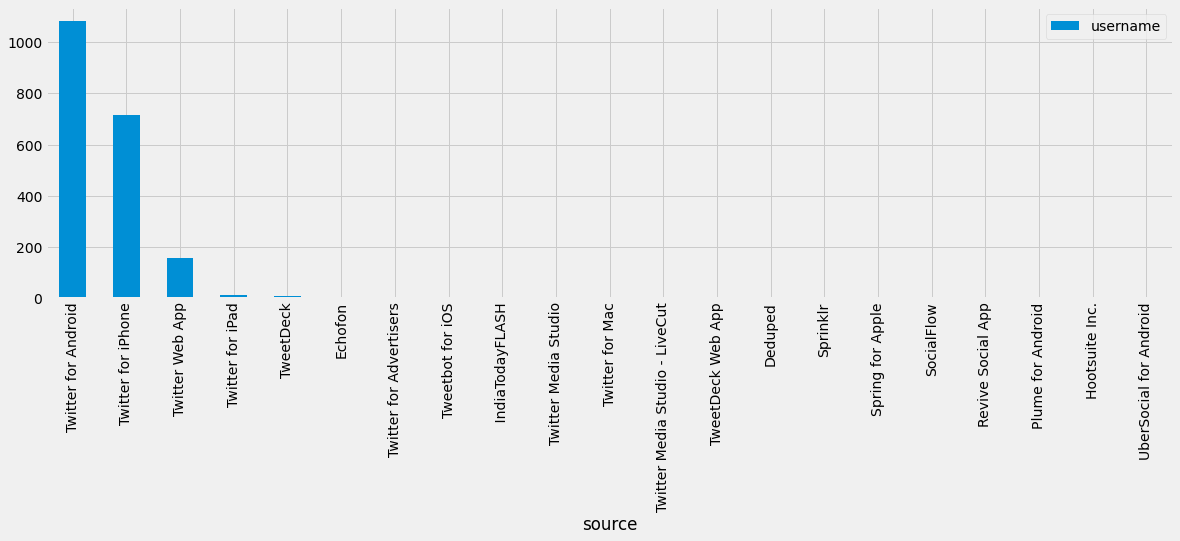

In [ ]:
df5.groupby(['source']).median().sort_values(['username'],ascending=False).plot(kind='bar',figsize=[18,5]);


**Top 10 user with highest follower**

In [ ]:
df_topfollowed = df2.nlargest(10, 'follower')

fig = px.bar(df_topfollowed, x='username', y='follower', color='username', orientation='v', hover_data=['Friends','Like','location'],
             labels={
                     "follower": "Total follower of user",
                     "username": "Name of the user"
                 },
            title="Top 10 user with highest number of follower")
fig.show()

**Tweet length distribution**

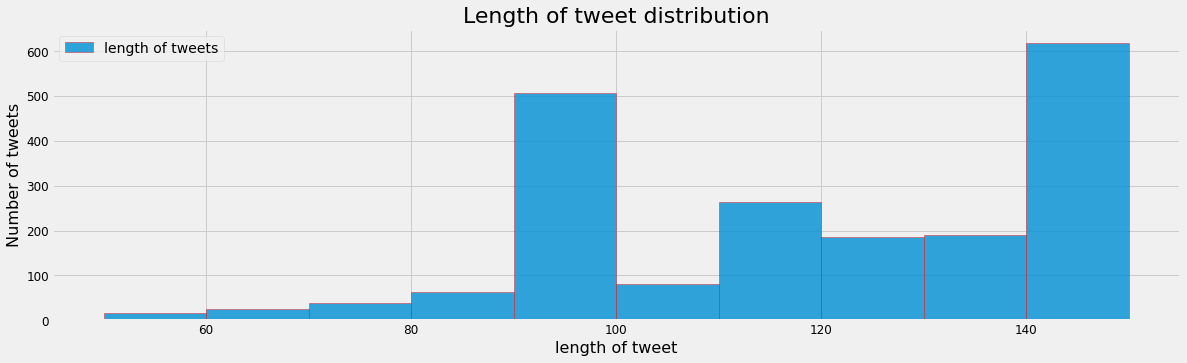

In [ ]:
plt.figure(figsize=(18, 5))

plt.hist(df2['len'].astype('float'), bins = 10, range = (50,150), label='length of tweets', alpha=0.8, edgecolor='red')

plt.title('Length of tweet distribution', fontsize=22)
plt.xlabel('length of tweet', fontsize=16)
plt.ylabel('Number of tweets', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
 
# Showing the plot using plt.show()
plt.show()

**Top 10 user with highest tweets**

In [ ]:
df_toptweets = df2.nlargest(10, 'tweet_count')

fig = px.bar(df_toptweets, y='username', x='tweet_count', color='username', orientation='h', hover_data=['Friends','Like','location','follower'],
             labels={
                     "tweet_count": "Total tweet count of user",
                     "username": "Name of the user"
                 },
            title="Top 10 user with highest number of tweets")
fig.show()

**followers of celebrity from res dataframe**

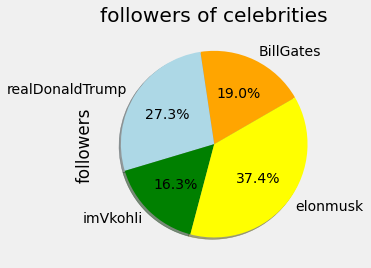

In [ ]:
colors = ['orange', 'lightblue','green','yellow']
dfJT2 = res.set_index('Username')
dfJT2.plot.pie(y='followers',title="followers of celebrities", legend=False, \
                   autopct='%1.1f%%', colors=colors , \
                   shadow=True, startangle=30);

# Sentiment Analysis

**Replace occurences of `RT` with a default value**

In [ ]:
def replace_retweet(tweet, default_replace=""):
  tweet = re.sub('RT\s+', default_replace, tweet)
  return tweet

**Replace occurences of `usertag` with a default value**

In [ ]:
def replace_user(tweet, default_replace=""):
  tweet = re.sub('\B@\w+', default_replace, tweet)
  return tweet

**Replace occurences of `emoji` with a default value**

In [ ]:
import emoji
def demojize(tweet):
  tweet = emoji.demojize(tweet)
  return tweet

**Replace occurences of `URL` with a default value**

In [ ]:
def replace_url(tweet, default_replace=""):
  tweet = re.sub('(http|https):\/\/\S+', default_replace, tweet)
  return tweet

**Replace occurences of `hashtag` with a default value**

In [ ]:
def replace_hashtag(tweet, default_replace=""):
  tweet = re.sub('#+', default_replace, tweet)
  return tweet

**tweet to lowercase**

In [ ]:
def to_lowercase(tweet):
  tweet = tweet.lower()
  return tweet

**Remove the repetation of words**

In [ ]:
def word_repetition(tweet):
  tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
  return tweet

**Remove the repetation of punctuations**

In [ ]:
def punct_repetition(tweet, default_replace=""):
  tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])', default_replace, tweet)
  return tweet

**Normalizing the data using above created functions**

In [ ]:
df2['tweets'] = df2['tweets'].apply(replace_retweet).apply(replace_user).apply(demojize).apply(replace_url).apply(replace_hashtag).apply(to_lowercase).apply(word_repetition).apply(punct_repetition)
df2

**Displaying most number of used words in tweets**

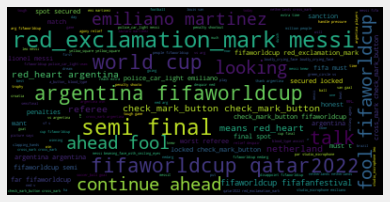

In [ ]:
from wordcloud import WordCloud
pos_tweets = df2["tweets"]
txt = " ".join(tweet.lower() for tweet in pos_tweets)
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


**Running Sentiment analysis using Textblob**

In [ ]:
from textblob import TextBlob
for row in df2.itertuples():
    tweet = df2.at[row[0], 'tweets']
    #run sentiment using TextBlob
    analysis = TextBlob(tweet)
    #set value to dataframe
    df2.at[row[0], 'polarity'] = analysis.sentiment[0]
    df2.at[row[0], 'subjectivity'] = analysis.sentiment[1]
    #Create Positive / negative column depending on polarity
    if analysis.sentiment[0]>0:
        df2.at[row[0], 'Sentiment'] = "Positive"
    elif analysis.sentiment[0]<0:
        df2.at[row[0], 'Sentiment'] = "Negative"
    else:
        df2.at[row[0], 'Sentiment'] = "Neutral"

In [ ]:
df2

,tweets,id,len,date,source,likes,retweets,sentiment,polarity,subjectivity,Sentiment
0,: takes a load of bollocks to take a free-kick...,1601341967912570880,140,2022-12-09 22:24:11,Twitter for iPhone,0,209,"(0.0, 0.0)",0.00,0.0,Neutral
1,: :red_exclamation_mark:messi: “what are you l...,1601341967337938944,115,2022-12-09 22:24:11,Twitter for iPhone,0,212,"(0.0, 0.0)",0.00,0.0,Neutral
2,: :red_exclamation_mark:messi: “what are you l...,1601341967249846273,115,2022-12-09 22:24:11,Twitter for Android,0,212,"(0.0, 0.0)",0.00,0.0,Neutral
3,: semi-final spot: secured :locked::check_mark...,1601341967048527872,97,2022-12-09 22:24:11,Twitter for iPhone,0,1051,"(0.0, 0.0)",0.00,0.0,Neutral
4,: :portugal: cristiano ronaldo after 100 games...,1601341966712995841,137,2022-12-09 22:24:11,Twitter for Android,0,14366,"(0.0, 0.0)",0.00,0.0,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
1995,: :police_car_light: emiliano martinez: “we’re...,1601341248303874048,128,2022-12-09 22:21:19,Twitter for Android,0,269,"(0.0, 0.0)",0.00,0.0,Neutral
1996,: argentina proceed to 2022 world cup semi-fin...,1601341246769106944,140,2022-12-09 22:21:19,Twitter Web App,0,10,"(0.0, 0.0)",0.00,0.0,Neutral
1997,: messi is goated :goat: fifaworldcup arg,1601341246420975616,53,2022-12-09 22:21:19,Twitter for iPhone,0,1,"(0.0, 0.0)",0.00,0.0,Neutral
1998,: :police_car_light: emiliano martinez: “we ha...,1601341246416748544,98,2022-12-09 22:21:19,Twitter for iPhone,0,726,"(-0.45, 1.0)",-0.45,1.0,Negative


**results observed from sentiment analysis**

In [ ]:
df2.groupby(['Sentiment'])['tweets'].count().reset_index()

,Sentiment,tweets
0,Negative,255
1,Neutral,1223
2,Positive,522
